# Steps to a DS Project

1. Understanding of problem
2. Understanding of the company/area
3. Extractions/Obtaining of data
4. Data Cleaning
5. EDA
6. MOdelling/Algorithm Development
7. Results Interpretation
8. Deploy/Production

# Price Prediction - Rio de Janeiro Airbnb Project

### Our goals:
1. Build a price forecast model that will allow an average house owner to know how much he/she should charge for te daily rate
2. For an average renter, given the apartment he/she is looking for, help to know if that unit has an attractive price (below average for units with the same features/ammenities) or not

### Available data:
- Kaggle: https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro?resource=download

### Initial Hypothesis
- Seasonality may be an important factor - months such as December tend to be really expensive in Rio
- The unit's location matters (safety, beauty, near touristic points etc)
- Additional ammenities may be a significant impact since there are lots of old houses and apartments in the city

# Import Libraries and DB

In [129]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
path_db = pathlib.Path('Linear Regression')

meses =  {'jan':1, 'fev':2, 'mar':3, 'abr':4, 'mai':5, 'jun':6, 'jul':7, 'ago':8, 'set':9, 'out':10, 'nov':11, 'dez':12}

airbnb_db = pd.DataFrame()

for arquivo in path_db.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:-4]
#     ano = int(ano.replace('.csv', ''))
    
#     df = pd.read_csv(path_db / arquivo.name, encoding='latin-1', error_bad_lines=False,  lineterminator='\n')
    df = pd.read_csv(path_db / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    airbnb_db = airbnb_db.append(df)

display(df)

<ipython-input-136-c4e92f129d9d>:15: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_db / arquivo.name)
<ipython-input-136-c4e92f129d9d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airbnb_db = airbnb_db.append(df)
<ipython-input-136-c4e92f129d9d>:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_db / arquivo.name)
<ipython-input-136-c4e92f129d9d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airbnb_db = airbnb_db.append(df)
<ipython-input-136-c4e92f129d9d>:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_db / arquivo.name)
<ipython-input-136-c4e92f129d9d>

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ano,mes
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1,0,0,2.13,2019,9
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3,0,0,2.06,2019,9
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1,0,0,2.36,2019,9
3,35636,https://www.airbnb.com/rooms/35636,20190923212307,2019-09-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1,0,0,2.25,2019,9
4,35764,https://www.airbnb.com/rooms/35764,20190923212307,2019-09-24,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1,0,0,2.83,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,flexible,f,f,15,15,0,0,NaN,2019,9
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,flexible,f,f,1,1,0,0,NaN,2019,9
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,strict_14_with_grace_period,f,f,29,23,6,0,NaN,2019,9
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,NaN,2019,9


In [105]:
df.head(1000).to_csv('primeiros_registros.csv', sep=';')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ano,mes
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1,0,0,2.13,2019,9
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3,0,0,2.06,2019,9
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1,0,0,2.36,2019,9
3,35636,https://www.airbnb.com/rooms/35636,20190923212307,2019-09-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1,0,0,2.25,2019,9
4,35764,https://www.airbnb.com/rooms/35764,20190923212307,2019-09-24,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1,0,0,2.83,2019,9


# Data Cleaning

- Since we have a lot of columns, our model can become very slow. 
- Besides, a fast analysis tells us we don't need all columns
- Therefore, we will exclude some columns from our df:
1. IDs, Links and irrelevant info (for our model)
2. Repeated columns/very similar to another (give the same info. e.g. date = year/month)
3. All free text columns 

- For that, we'll create an Excel with the first 1k lines and run a qualitative analysis

# After the qualitative analysis done in the previous step, these are the resulting columns:

In [137]:
colunas = ['host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes'
]

In [138]:
# print(df[['host_is_superhost']].value_counts())
# print((df['host_listings_count']==df['host_total_listings_count']).value_counts())
# print(df['square_feet'].isnull().sum())

In [139]:
df = df.loc[:, colunas]
display(df)

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,t,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,2.0,2.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2019,9
1,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
2,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2019,9
3,t,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,1.0,2.0,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
4,t,1.0,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,f,0.0,-23.00318,-43.34284,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34325,f,0.0,-22.96664,-43.39345,Apartment,Entire home/apt,4,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34326,f,32.0,-22.96208,-43.17552,Apartment,Entire home/apt,5,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
34327,f,0.0,-23.00340,-43.34182,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


# Treating NaN values
## You can either:
    - replace with another anumber
    - exclude from df
    
- Visualizing the df, I noticed a great discrepancy in the missing values, therefore, the columns with more than 50% of values as NaN (16.000) were excluded from the analysis.
- For all the other columns, because we have a lot of data (more than 50%), I'm going to exclude the the rows containing NaN values

In [140]:
print(df.isnull().sum())

host_is_superhost                 14
host_listings_count               14
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         57
bedrooms                          29
beds                              35
bed_type                           0
amenities                          0
price                              0
security_deposit               15325
cleaning_fee                   11527
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews_ltm              0
review_scores_rating           16997
review_scores_accuracy         17017
review_scores_cleanliness      17013
review_scores_checkin          17020
review_scores_communication    17012
review_scores_location         17015
review_scores_value            17015
i

In [141]:
for coluna in df:
    if df[coluna].isnull().sum() > 13000:
        df = df.drop(coluna, axis = 1)
print(df.isnull().sum())

print(df.shape)

host_is_superhost              14
host_listings_count            14
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      57
bedrooms                       29
beds                           35
bed_type                        0
amenities                       0
price                           0
cleaning_fee                11527
guests_included                 0
extra_people                    0
minimum_nights                  0
maximum_nights                  0
number_of_reviews_ltm           0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
ano                             0
mes                             0
dtype: int64
(34329, 24)


In [142]:
df = df.dropna()

print(df.isnull().sum())

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
cleaning_fee                0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews_ltm       0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


# Verifying dtypes

In [143]:
print(df.dtypes)
print('-'*60)
print(df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
cleaning_fee                 object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews_ltm         int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                          object
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                            

- Since "price" and "extra people" are objects and not floats, we are going to change the column type

In [159]:
# price - float32 uses less storage space hence it is recommended to use it than float64
df['price'] = df['price'].astype(str).replace('$', '')
df['price'] = df['price'].astype(str).replace(',','')
df['price'] = df['price'].astype(np.float32, copy = False)

# extra people
df['extra_people'] = df['extra_people'].astype(str).replace('$','')
df['extra_people'] = df['extra_people'].astype(str).replace(',','')
df['extra_people'] = df['extra_people'].astype(np.float32, copy = False)

print(df.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
cleaning_fee                 object
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews_ltm         int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                          object
mes                           int64
dtype: object


# EDA and Outliers Treatment

1. Check the correlation among features
2. Remove outliers (values < Q1 - 1.5xAmplitude && values > Q3 + 1.5xAmplitude)
3. Confirm if all features really make sense to our model

- We'll start with the continuous monetary variables - price and extra people
- Then, we'll look into out discrete numeric values (accomodates, bedrooms, etc)
- Finally, we'll look into the text columns and define which categories we should keep

<AxesSubplot:>

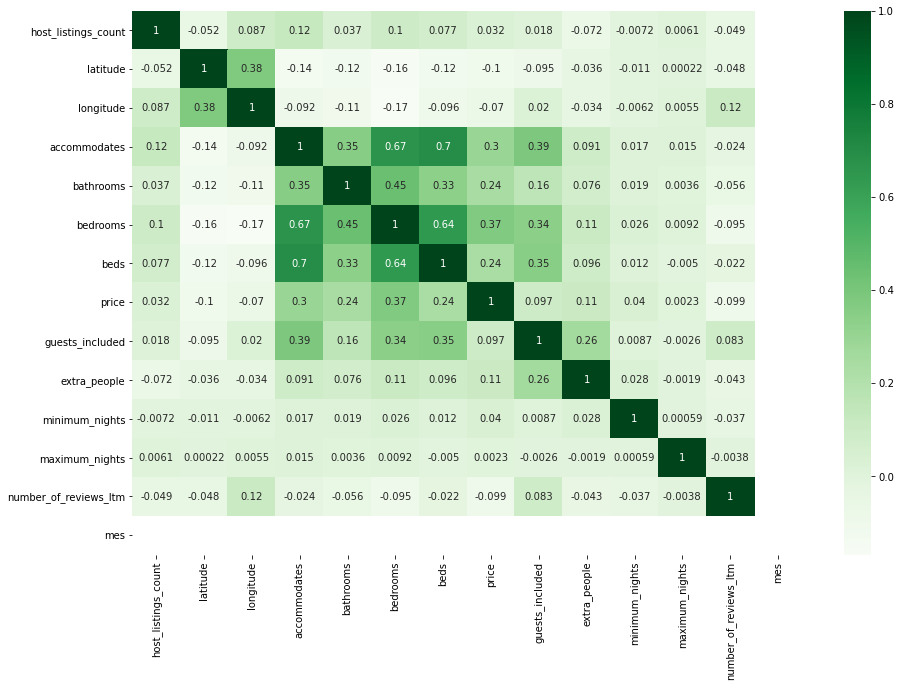

In [160]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

### Function definition for the treatment of outliers

In [161]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1- 1.5 * amplitude, q3 + 1.5 * amplitude

(-0.5, 3.5)


count    22757.000000
mean       511.468170
std       1220.159424
min          0.000000
25%        150.000000
50%        250.000000
75%        499.000000
max      41592.000000
Name: price, dtype: float64